In [5]:
# Install librosa library:

! pip install librosa

In [6]:
import librosa
import librosa.display
import IPython.display as ipd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Load the audio file:

ipd.Audio('file_example_WAV_2MG.wav')

In [8]:
# Reading the file using librosa library:

music, sr = librosa.load('file_example_WAV_2MG.wav')

In [9]:
print("Shape of the audio file: ", music.shape)
print("Sample rate of the audio file: ", sr)

Shape of the audio file:  (739329,)
Sample rate of the audio file:  22050


In [10]:
# Duration of one sample in seconds:

sample_duration = 1/sr
print("Duration of one sample is ", sample_duration, "seconds")

Duration of one sample is  4.5351473922902495e-05 seconds


In [11]:
# Total no of samples:

tot_samples = len(music)
tot_samples

739329

In [12]:
# Duration of the whole audio:

duration = 1/sr * tot_samples
print("Duration of the whole audio is ", duration,"seconds")

Duration of the whole audio is  33.52965986394558 seconds


Text(0.5, 1.0, 'Sample audio waveplot')

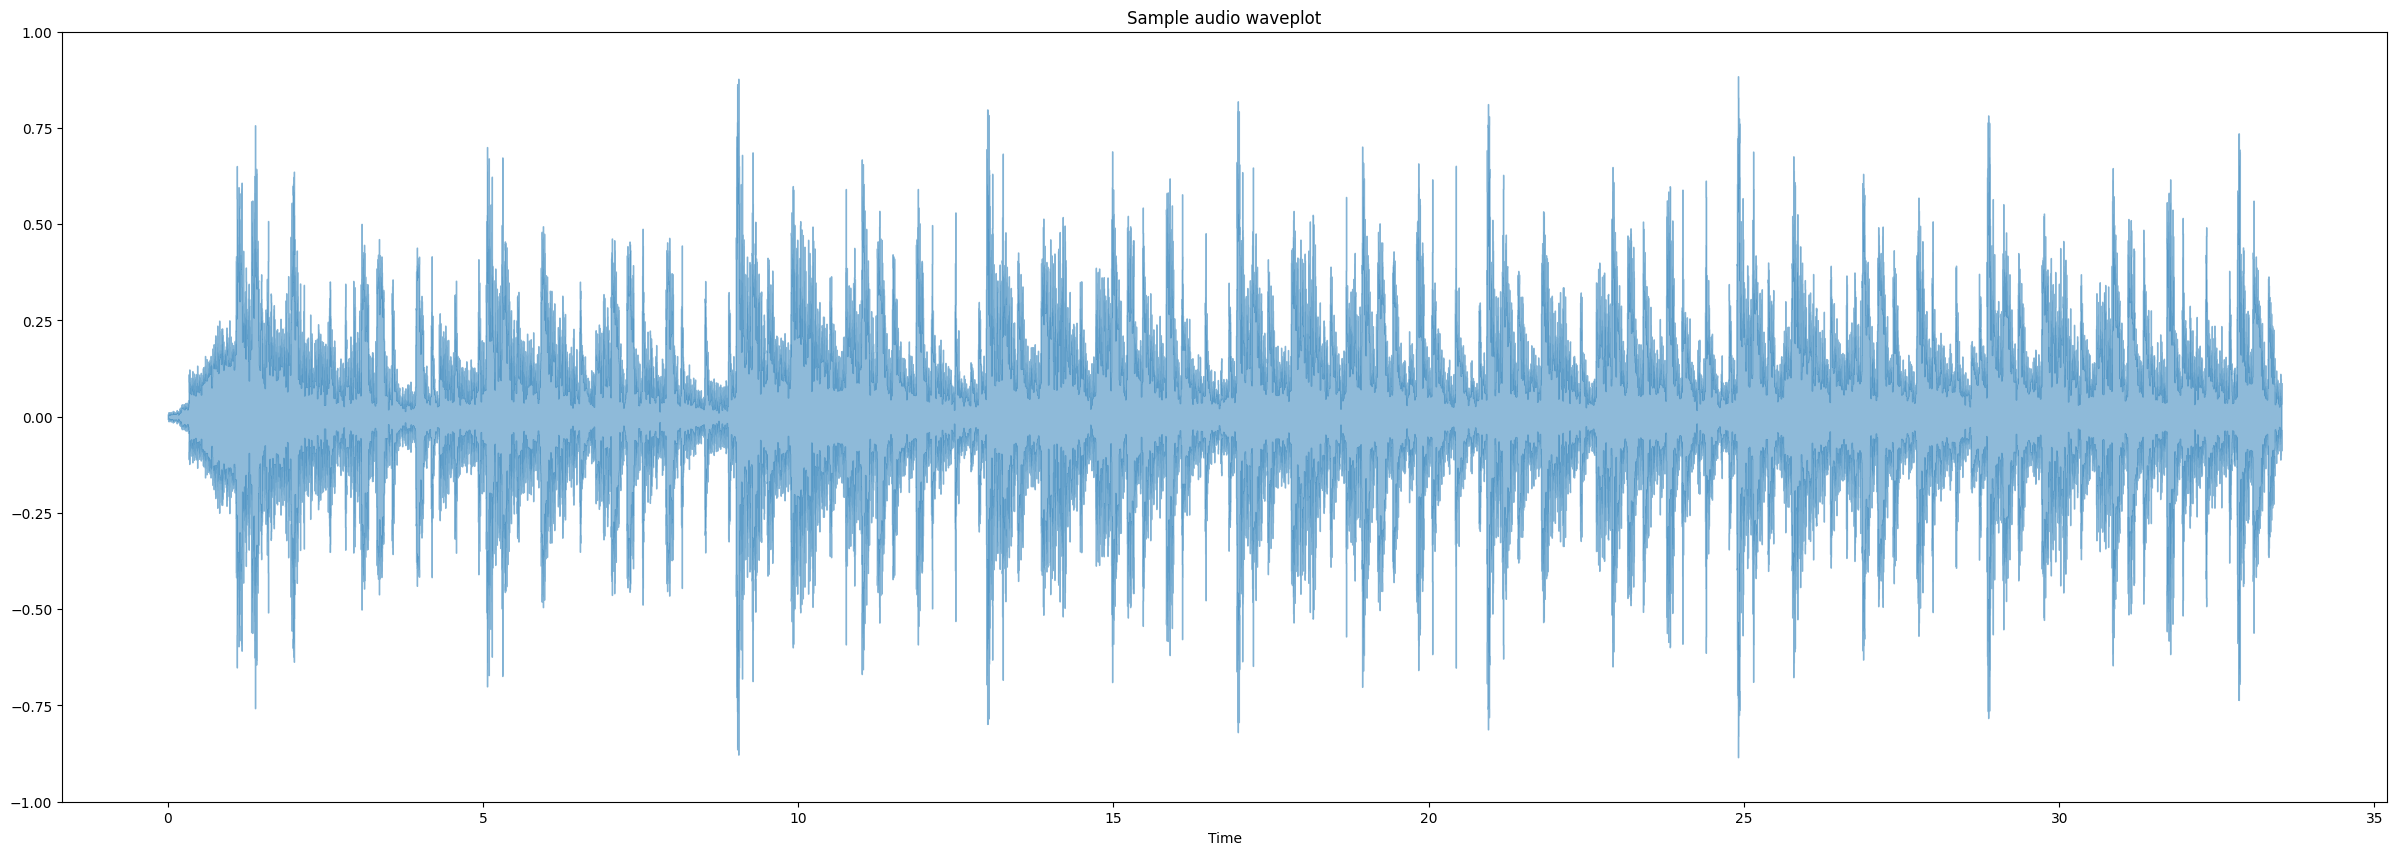

In [13]:
# Visualising audio signal in the time domain:

plt.figure(figsize=(30,10))

librosa.display.waveshow(music, alpha=0.5)
plt.ylim((-1,1))
plt.title("Sample audio waveplot")

Extracting time domain audio features:

Different time domain features are:

- Amplitude Envelop
- Zero Crossing Rate
- Root Mean Square Energy

In [14]:
# Amplitude Envelop -- maximum value of all the samples in a frame:

FRAME_SIZE = 1024
HOP_LENGTH = 512 # used for overlapping frames

def amplitude_envelope(signal, frame_size, hop_length):
  amplitude_envelop = []
  # Calculate amplitude envelop for each frame:

  for i in range(0, len(signal), hop_length):
    amplitude_envelop_current_frame = max(signal[i:i+frame_size])
    amplitude_envelop.append( amplitude_envelop_current_frame)

  return np.array(amplitude_envelop)


In [15]:
AE_music = amplitude_envelope(music, FRAME_SIZE, HOP_LENGTH)

In [16]:
# If we want to see how many frames are there:

print("Total number of frames produced:", len(AE_music)) # AE_music.shape

Total number of frames produced: 1445


(-1.0, 1.0)

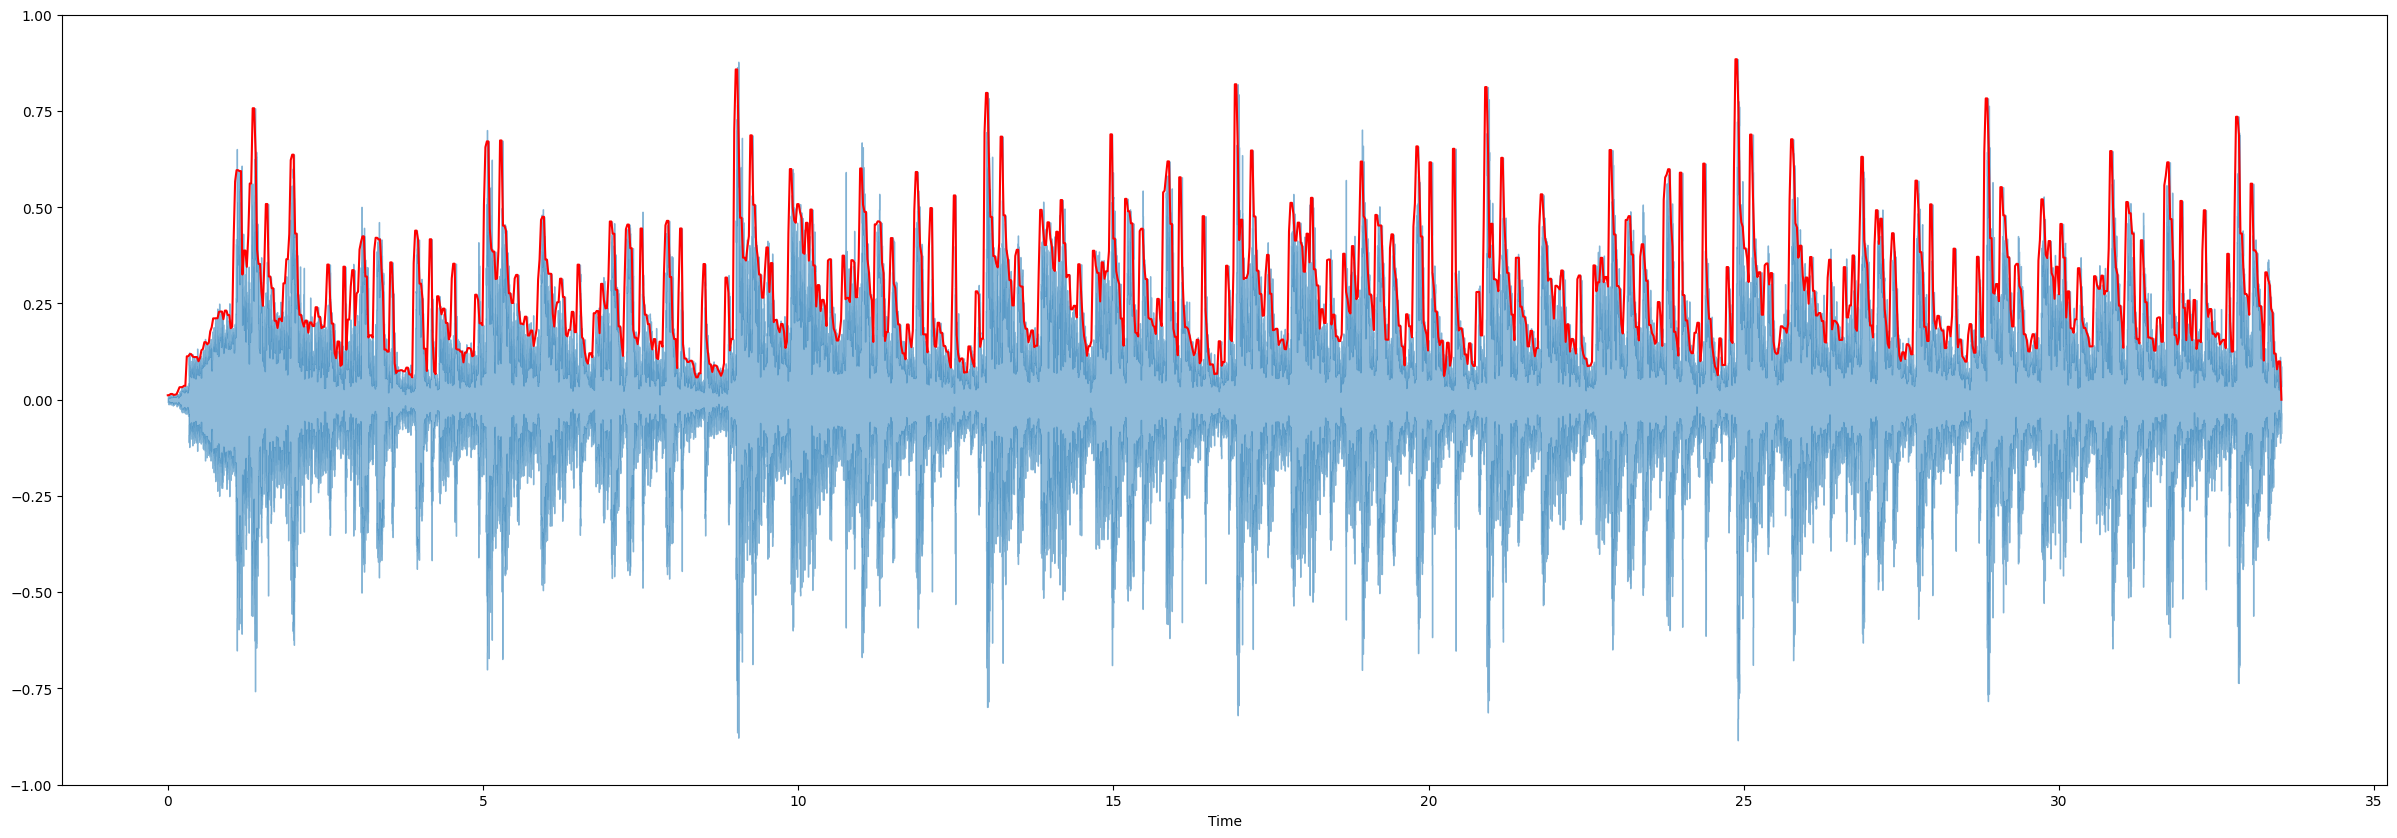

In [17]:
# Visualising the Amplitude Envelop:

frames = range(len(AE_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30,10))

librosa.display.waveshow(music, alpha=0.5)
plt.plot(t, AE_music, color='r')
plt.ylim((-1,1))

In [18]:
# Zero Crossing Rate -- rate at which the signal crosses the negative value to zero and then to the positive value:

ZCR_music = librosa.feature.zero_crossing_rate(music, frame_length= FRAME_SIZE, hop_length=HOP_LENGTH)[0]

In [19]:
ZCR_music.shape

(1445,)

In [20]:
frames = range(len(ZCR_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

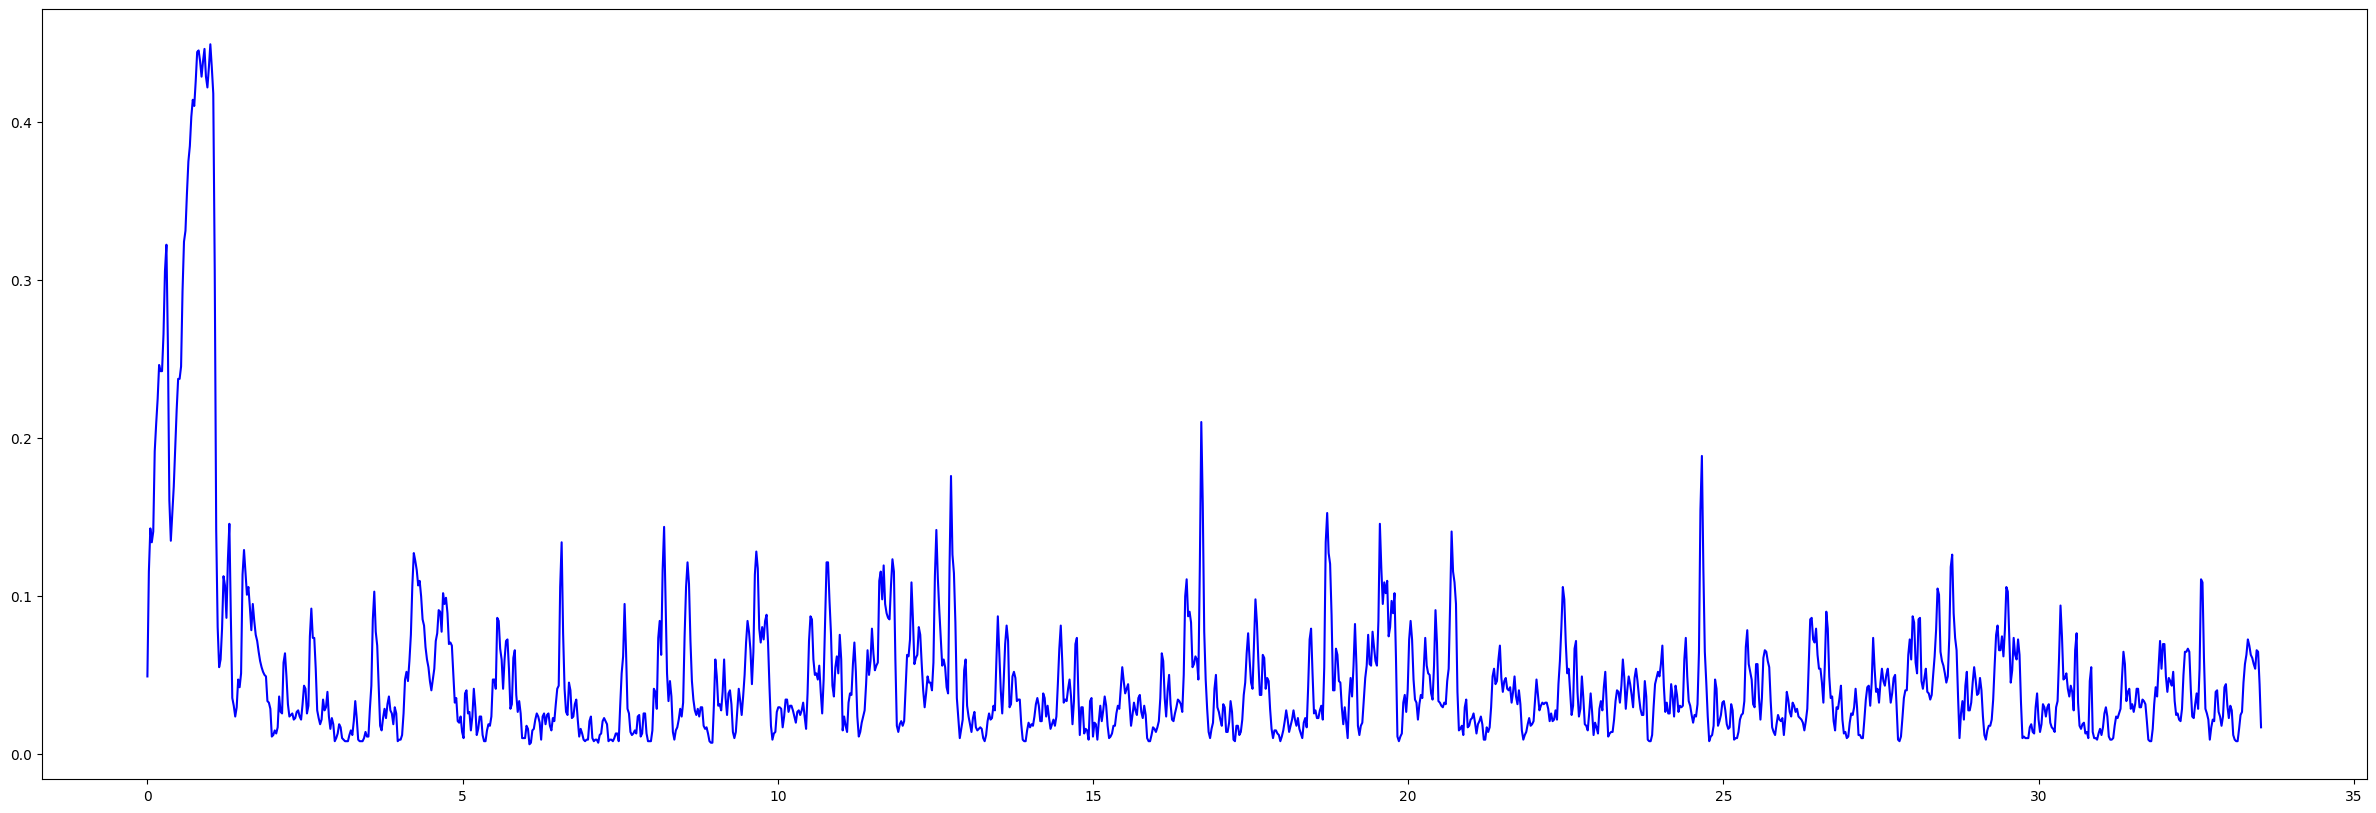

In [21]:
# Visualising Zero crosiing rate:

plt.figure(figsize=(30,10))
plt.plot(t, ZCR_music, color='b')

In [22]:
# Root Mean Square Energy -- the root mean of all the samples present in a frame:

RMS_music = librosa.feature.rms(y=music, frame_length = FRAME_SIZE, hop_length = HOP_LENGTH)[0]

(-1.0, 1.0)

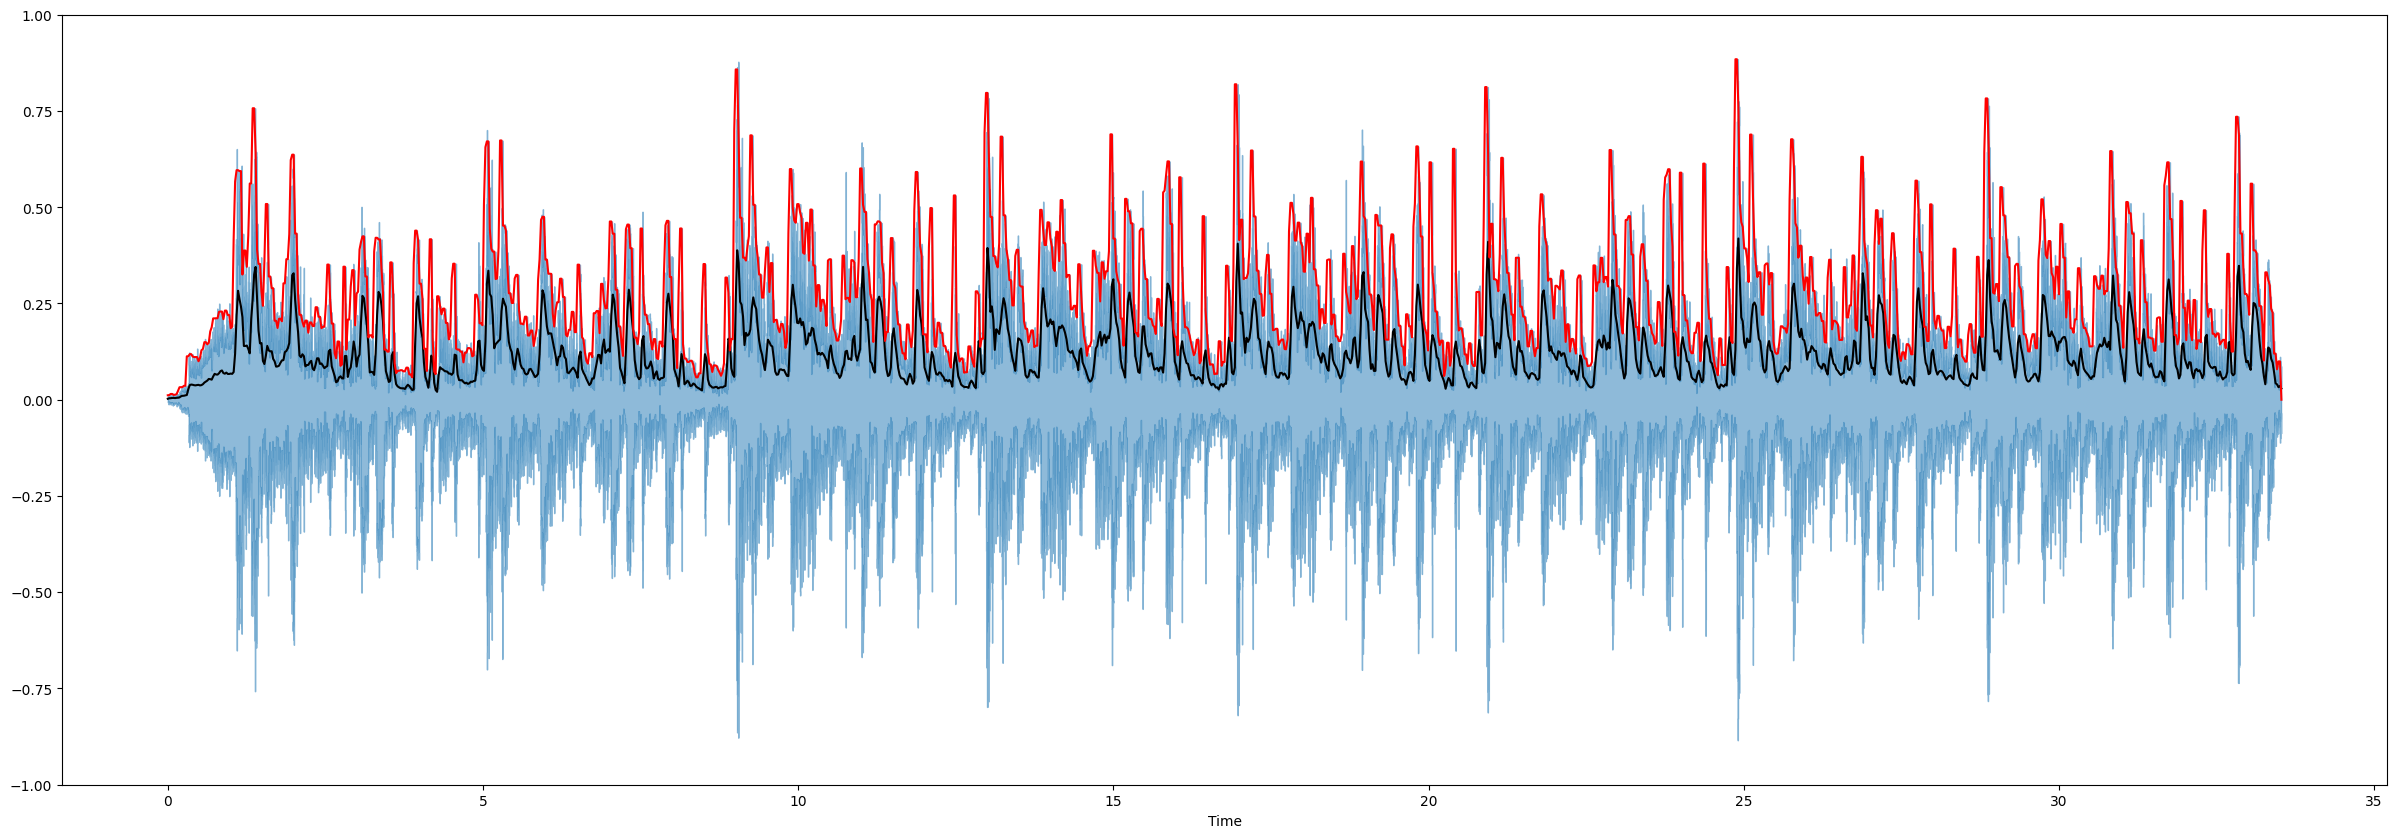

In [23]:
# Visualising the Root Mean Square Energy:

frames = range(len(RMS_music))
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)

plt.figure(figsize=(30,10))
librosa.display.waveshow(music, alpha=0.5)
plt.plot(t, RMS_music, color='black')
plt.plot(t, AE_music, color='r') # amlitude envelop
plt.ylim((-1,1))

Fourier Transform:

- Spectogram
- Mel Frequency Cepstral Coefficients


In [24]:
fft_music = np.fft.fft(music)
len(fft_music)

739329

In [25]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
  fft_music = np.fft.fft(signal)
  fft_abs = np.absolute(fft_music)

  plt.figure(figsize=(18,5))

  f = np.linspace(0, sr, len(fft_abs))
  f_bins = int(len(fft_abs)*f_ratio)

  plt.plot(f[:f_bins], fft_abs[:f_bins])
  plt.xlabel('Frequency(Hz)')
  plt.title(title)


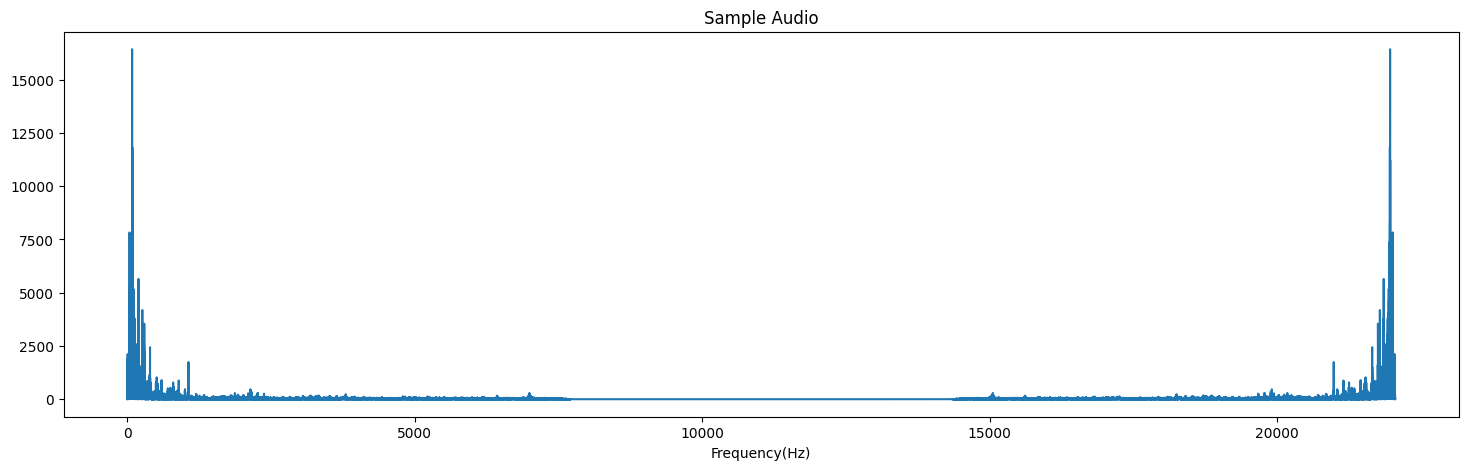

In [26]:
plot_magnitude_spectrum(music, sr, "Sample Audio", 1)

In [27]:
# Plotting a Spectogram -- Extracting short time fourier transform:

FRAME_SIZE = 2048
HOP_SIZE = 512

ssft = librosa.stft(music, n_fft = FRAME_SIZE, hop_length = HOP_SIZE)

In [28]:
type(ssft[0][0])

numpy.complex64

In [29]:
# Taking only absolute values:

ssft_abs = np.abs(ssft)**2
type(ssft_abs[0][0])


numpy.float32

In [30]:
def plot_spectogram(Y, sr, hop_length, y_axis="linear"):
  plt.figure(figsize=(25,10))
  librosa.display.specshow(Y,
                           sr=sr,
                           hop_length = hop_length,
                           x_axis = "time",
                           y_axis = y_axis)
  plt.colorbar(format="%+2.f")

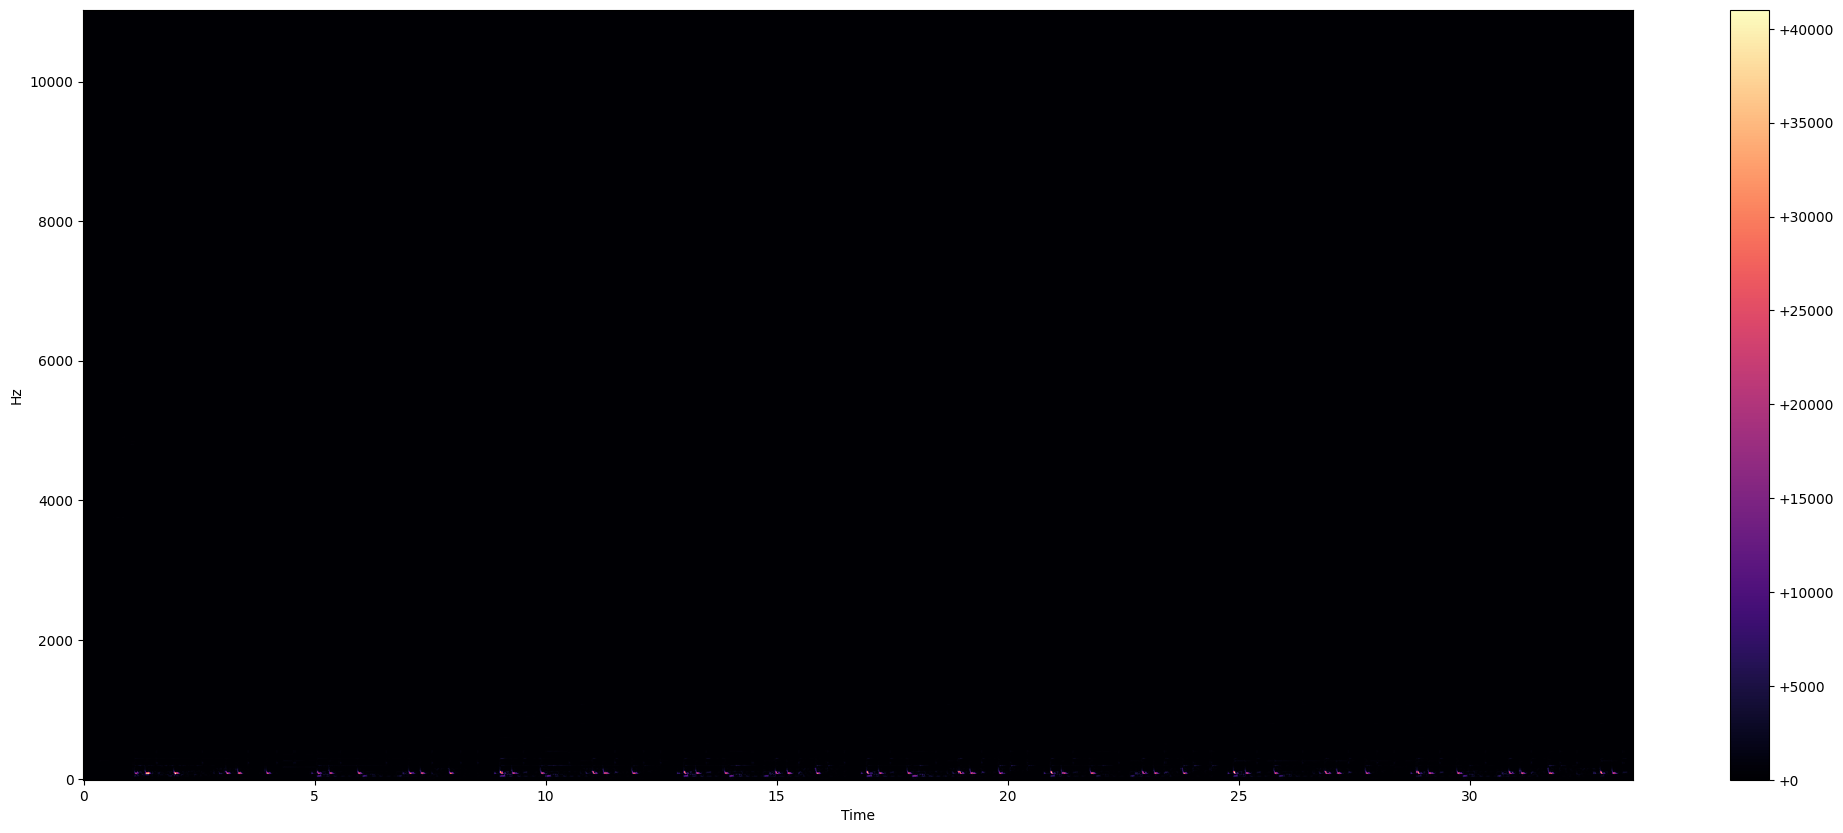

In [31]:
plot_spectogram(ssft_abs, sr, HOP_SIZE)

The plot is blank because our audio file have very low frequencies.

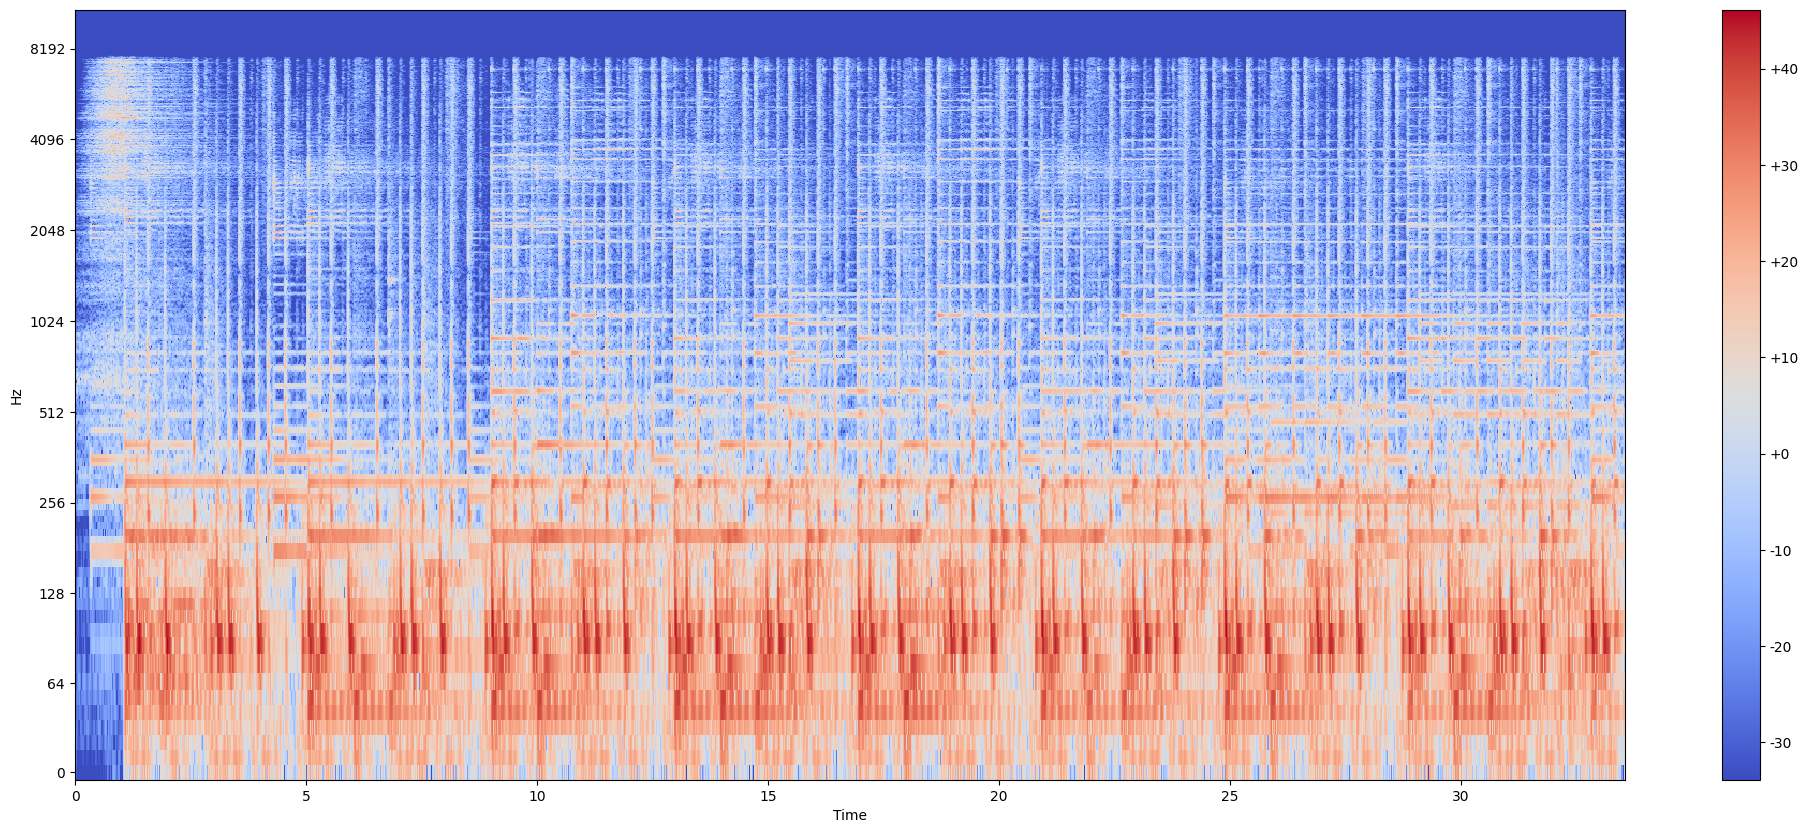

In [32]:
# Converting the low frequency values to log and then plotting the spectogram:

ssft_abs_log = librosa.power_to_db(ssft_abs)
plot_spectogram(ssft_abs_log, sr, HOP_SIZE, y_axis='log')

In [33]:
# Calculating Mel Frequency cepstral coefficients -- the mel-frequency cepstrum is a representation of the short-term
# power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.
# Mel-frequency cepstral coefficients are coefficients that collectively make up an MFC.

mfccs = librosa.feature.mfcc(y=music, n_mfcc=13, sr=sr) # Extracting MFCCs

In [34]:
# Extracting first order mfccs:

delta_mfccs = librosa.feature.delta(mfccs)

In [35]:
# Extracting second order mfccs:

delta2_mfccs = librosa.feature.delta(mfccs, order=2)

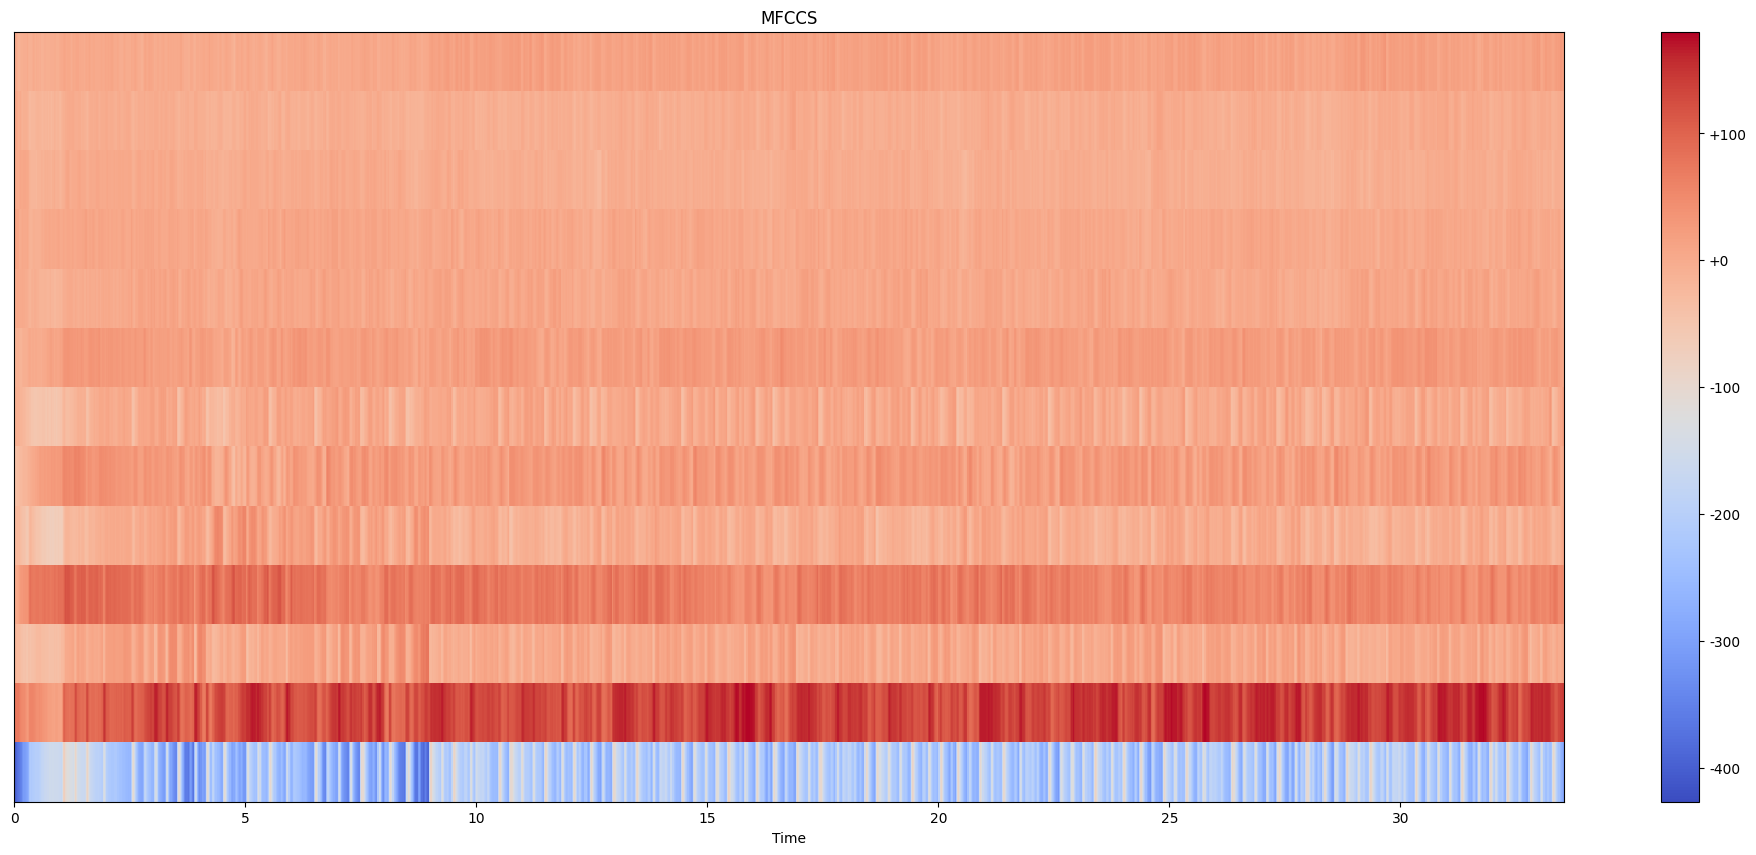

In [36]:
# Visualising MFCCs:

plt.figure(figsize=(25,10))
librosa.display.specshow(mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("MFCCS")
plt.show()

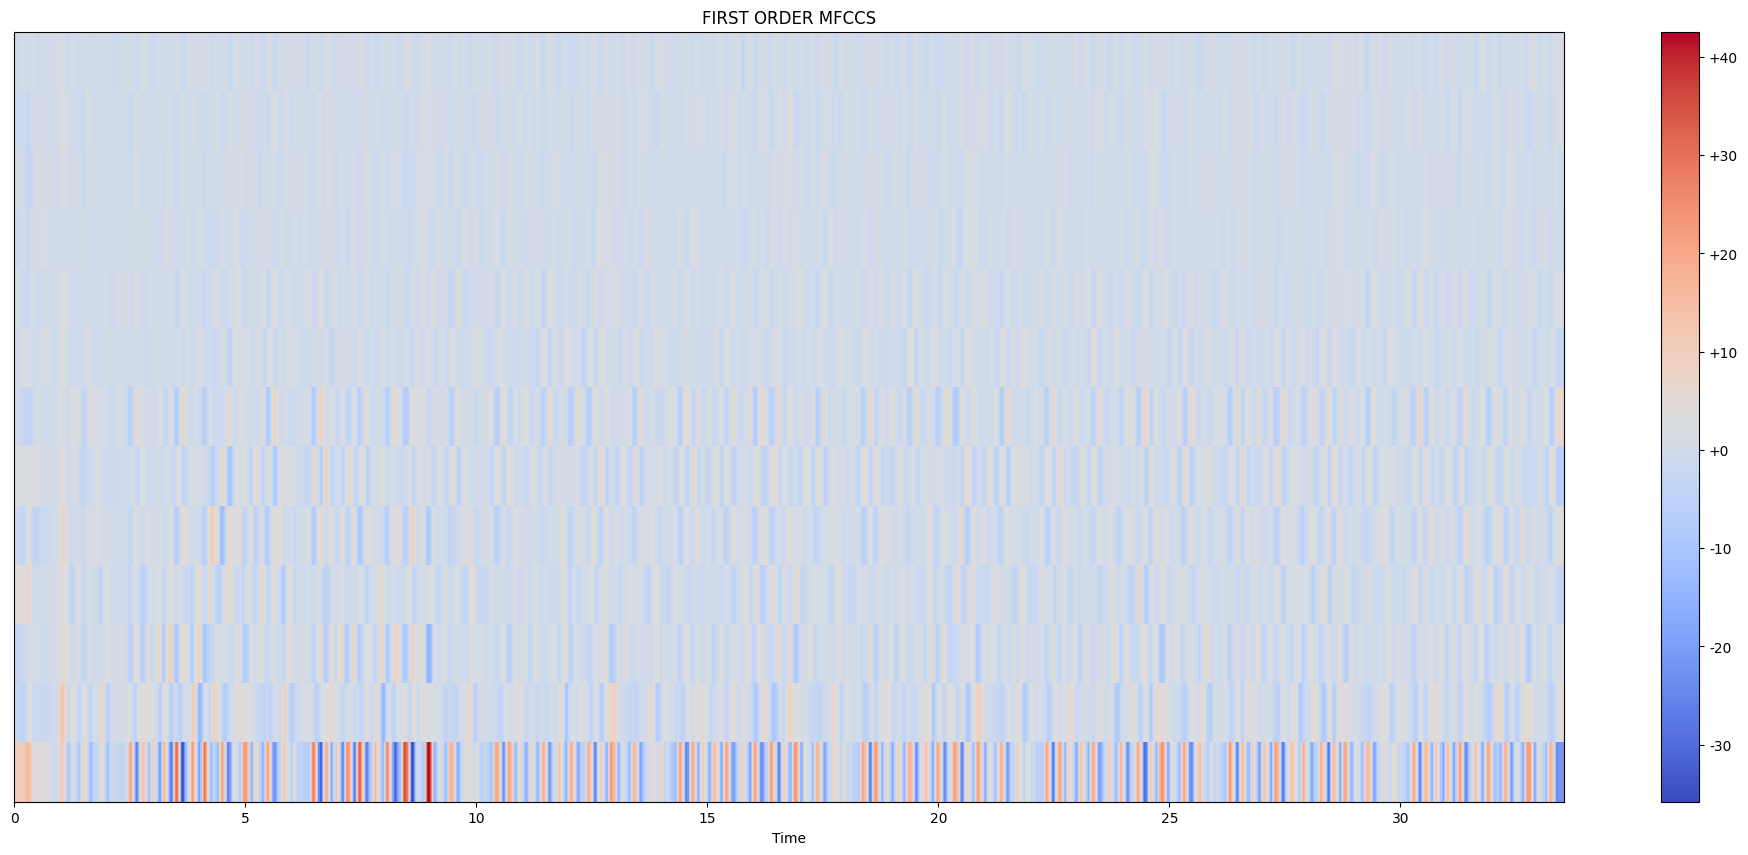

In [37]:
# First order:

plt.figure(figsize=(25,10))
librosa.display.specshow(delta_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("FIRST ORDER MFCCS")
plt.show()

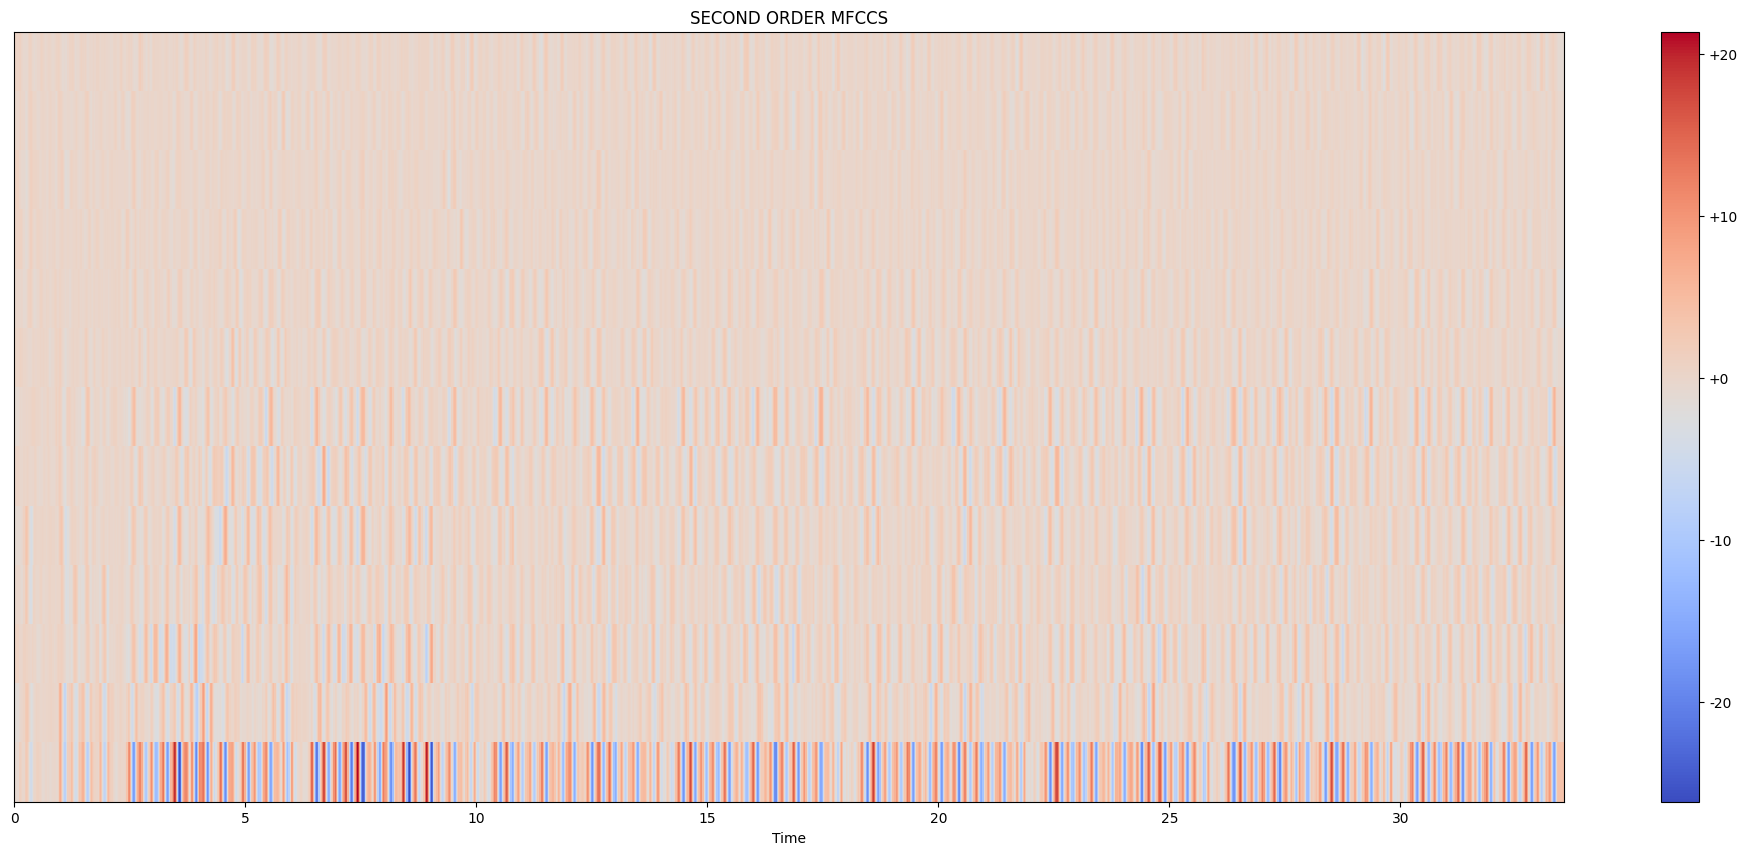

In [38]:
# Second order:

plt.figure(figsize=(25,10))
librosa.display.specshow(delta2_mfccs, x_axis="time", sr=sr)
plt.colorbar(format="%+2.f")
plt.title("SECOND ORDER MFCCS")
plt.show()